<a href="https://colab.research.google.com/github/waelrash1/forecastingmodelsPY/blob/main/CH06/CH06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling complex time series
* Examining the autoregressive moving average model or $ARMA(p,q)$
* Experimenting with the limitations of the $ACF$ and $PACF$ plots
* Selecting the best model with the Akaike information criterion $(AIC)$
* Analyzing a time series model using residual analysis
* Building a general modeling procedure
* Forecasting using the $ARMA(p,q)$ model

## Chapter 4

* Covered moving average process, denoted as $MA(q)$
* Present value is linearly dependent on mean, current error term, and past error terms
* Order $q$ can be inferred using $ACF$ plot
* Slowly decaying or sinusoidal $ACF$ plot may indicate autoregressive process instead


## Chapter 5

* Covered autoregressive process, denoted as $AR(p)$
* Present value is linearly dependent on its own past value
* Order $p$ can be inferred using $PACF$ plot


## Chapter 6

* Covers autoregressive moving average model, or $ARMA(p,q)$
* Examines limitations of $ACF$ and $PACF$ plots
* Selects best model with Akaike information criterion $(AIC)$
* Analyzes time series model using residual analysis
* Builds general modeling procedure
* Forecasts using $ARMA(p,q)$ model

## The chapter discusses
*  The autoregressive moving average process $(ARMA(p,q))$
* The order of the autoregressive portion is denoted by $p$, and the order of the moving average portion is denoted by $q$
* $ACF$ and $PACF$ plots can be used to determine $q$ and $p$, but they may not always be useful for complex time series
* A general modeling procedure is introduced to determine the optimal combination of $p$ and $q$ using the Akaike information criterion $(AIC)$
* The model's validity is evaluated using residual analysis, including correlogram, $Q-Q$ plot, and density plot of residuals to assess if they closely resemble white noise
* If the residuals resemble white noise, the $ARMA(p,q)$ model can be used for time series forecasting
* The concepts introduced in this chapter will be reused in further chapters for modeling non-stationary time series and incorporating seasonality and exogenous variables.

## Autoregressive moving average process
The autoregressive moving average process is a combination of the autoregressive
process and the moving average process.
It is denoted as $ARMA(p,q)$, where $p$ is the order of the autoregressive process, and
q is the order of the moving average process. The general equation of the $ARMA(p,q)$
model is

$$
\Large y_t= C+\phi_1 y_{t-1}+\phi_2 y_{t-2}+...+\phi_p y_{t-p}+\mu+\epsilon_t+\epsilon_{t-1}+\epsilon_{t-2}+...+\epsilon_{t-q}
$$

An $ARMA(0,q)$ process is equivalent to an $MA(q)$ process, since the order $p = 0$ cancels
the $AR(p)$ portion. An $ARMA(p,0)$ process is equivalent to an AR(p) process, since
the order $q = 0$ cancels the $MA(q)$ portion.

## ARMA(1,1) process
> Thus, if we have an $ARMA(1,1)$ process, we are combining an autoregressive process
of order $1$, or $AR(1)$, with a moving average process of order $1$, or $MA(1)$. Recall
that a first-order autoregressive process is a linear combination of a constant $C$, the
value of the series at the previous timestep $\phi_1 y_{t-1} $, and white noise $\epsilon_t$, as shown in equation

$$
\large AR(1) := y_t = C+\phi_1 y_{t-1}+\epsilon_t
$$



> Also recall that a first-order moving average process, or MA(1), is a linear combination
of the mean of the series μ, the current error term ϵt , and the error term at the
previous timestep θ1ϵt –1, as shown in equation 6.3.

$$
\large MA(1) := y_t = \mu+ \epsilon_t + \theta_1 \epsilon_{t-1}
$$



> We can combine the AR(1) and MA(1) processes to obtain an ARMA(1,1) process as
shown in equation 6.4, which combines the effects of equations 6.2 and 6.3.

$$
\large ARMA(1,1):= y_t= C+\phi_1 y_{t-1}+\epsilon_t+\theta_1 \epsilon_{t-1}
$$

## 6.3 Identifying a stationary ARMA process 

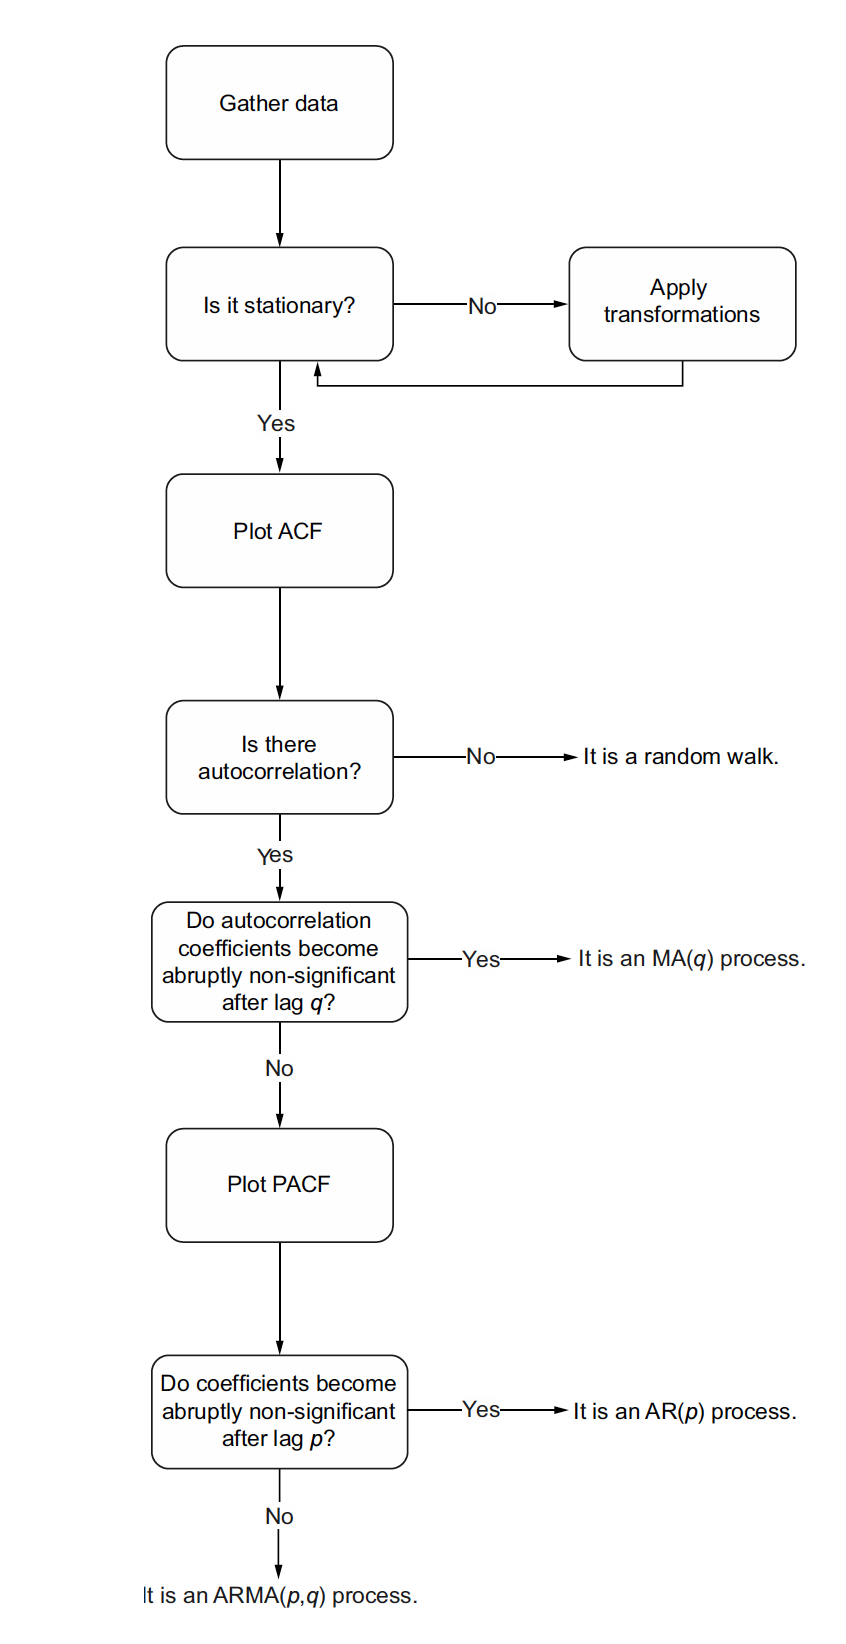

## Simulation $ARMA(1,1)$ process
We’ll simulate an $ARMA(1,1)$ process. This is equivalent to combining an $MA(1)$
process with an $AR(1)$ process. Specifically, we will simulate the $ARMA(1,1)$ process
defined in equation. Notice that the constant $C$ and mean μ are both equal to $0$
here. The coefficients $0.33$ and $0.9$ are subjective choices for this simulation.

$$
\Large y_t= 0.33 y_{t-1} + 0.9 \epsilon_{t-1} + \epsilon_{t}
$$


In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

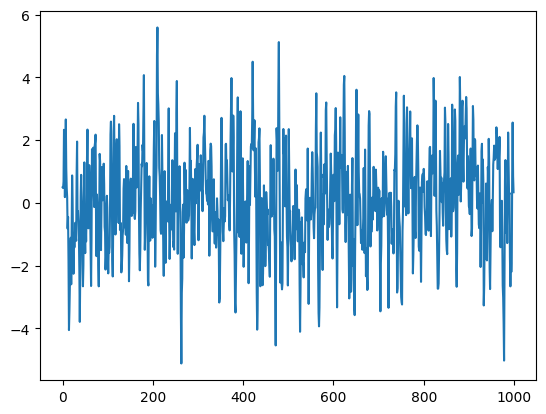

In [2]:
np.random.seed(42)

ar1 = np.array([1, -0.33])
ma1 = np.array([1, 0.9])

ARMA_1_1 = ArmaProcess(ar1, ma1).generate_sample(nsample=1000)
plt.plot(ARMA_1_1)

In [3]:
ADF_result = adfuller(ARMA_1_1)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -6.429878682042689
p-value: 1.7078466680097102e-08


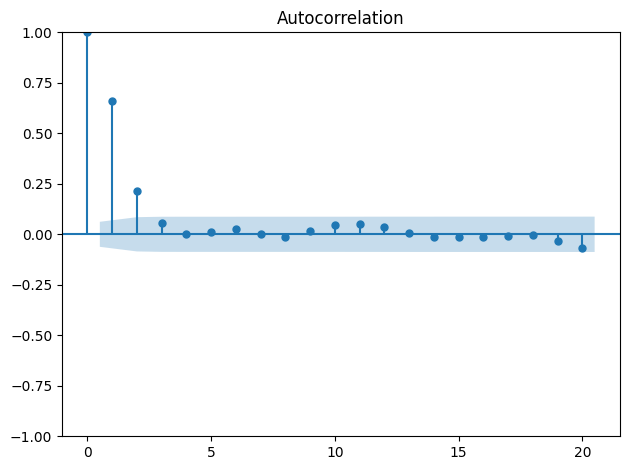

In [4]:
plot_acf(ARMA_1_1, lags=20);
plt.tight_layout()
plt.savefig('figures/CH06_F05_peixeiro.png', dpi=300)

> $ACF$ plot shows a sinusoidal pattern in the plot, which indicates the presence
of an autoregressive process. This is expected, since we simulated an $ARMA(1,1)$
process and we know of the existence of the autoregressive portion. Furthermore,
you’ll notice that the last significant coefficient is at $lag 2$. However, we know that our
simulated data has an $MA(1)$ process, so we would expect to have significant coefficients
up to $lag 1$ only. We can thus conclude that the $ACF$ plot does not reveal any
useful information about the order $q$ of our $ARMA(1,1)$ process.

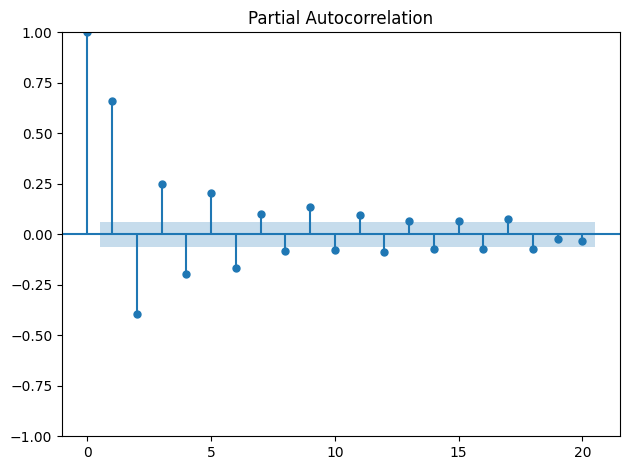

In [5]:
plot_pacf(ARMA_1_1, lags=20);
plt.tight_layout()
plt.savefig('figures/CH06_F06_peixeiro.png', dpi=300)

> In $PACF$ plot we can see a clear sinusoidal pattern, meaning that we cannot infer a
value for the order $p$. We know that we simulated an $ARMA(1,1)$ process, but we cannot
determine that value from the $PACF$ plot, since we have significant coefficients past $lag 1$. Therefore, the PACF plot cannot be used to find the order $p$ of
an $ARMA(p,q)$ process.
* Since there is no clear cutoff between significant and nonsignificant
coefficients in both the $ACF$ and $PACF$ plots, we can conclude that we have
an $ARMA(p,q)$ process, which is indeed the case.

## Identifying a stationary $ARMA(p,q)$ process
> If your process is stationary and both the $ACF$ and $PACF$ plots show a decaying or sinusoidal
pattern, then it is a stationary $ARMA(p,q)$ process.

## Devising a general modeling procedure

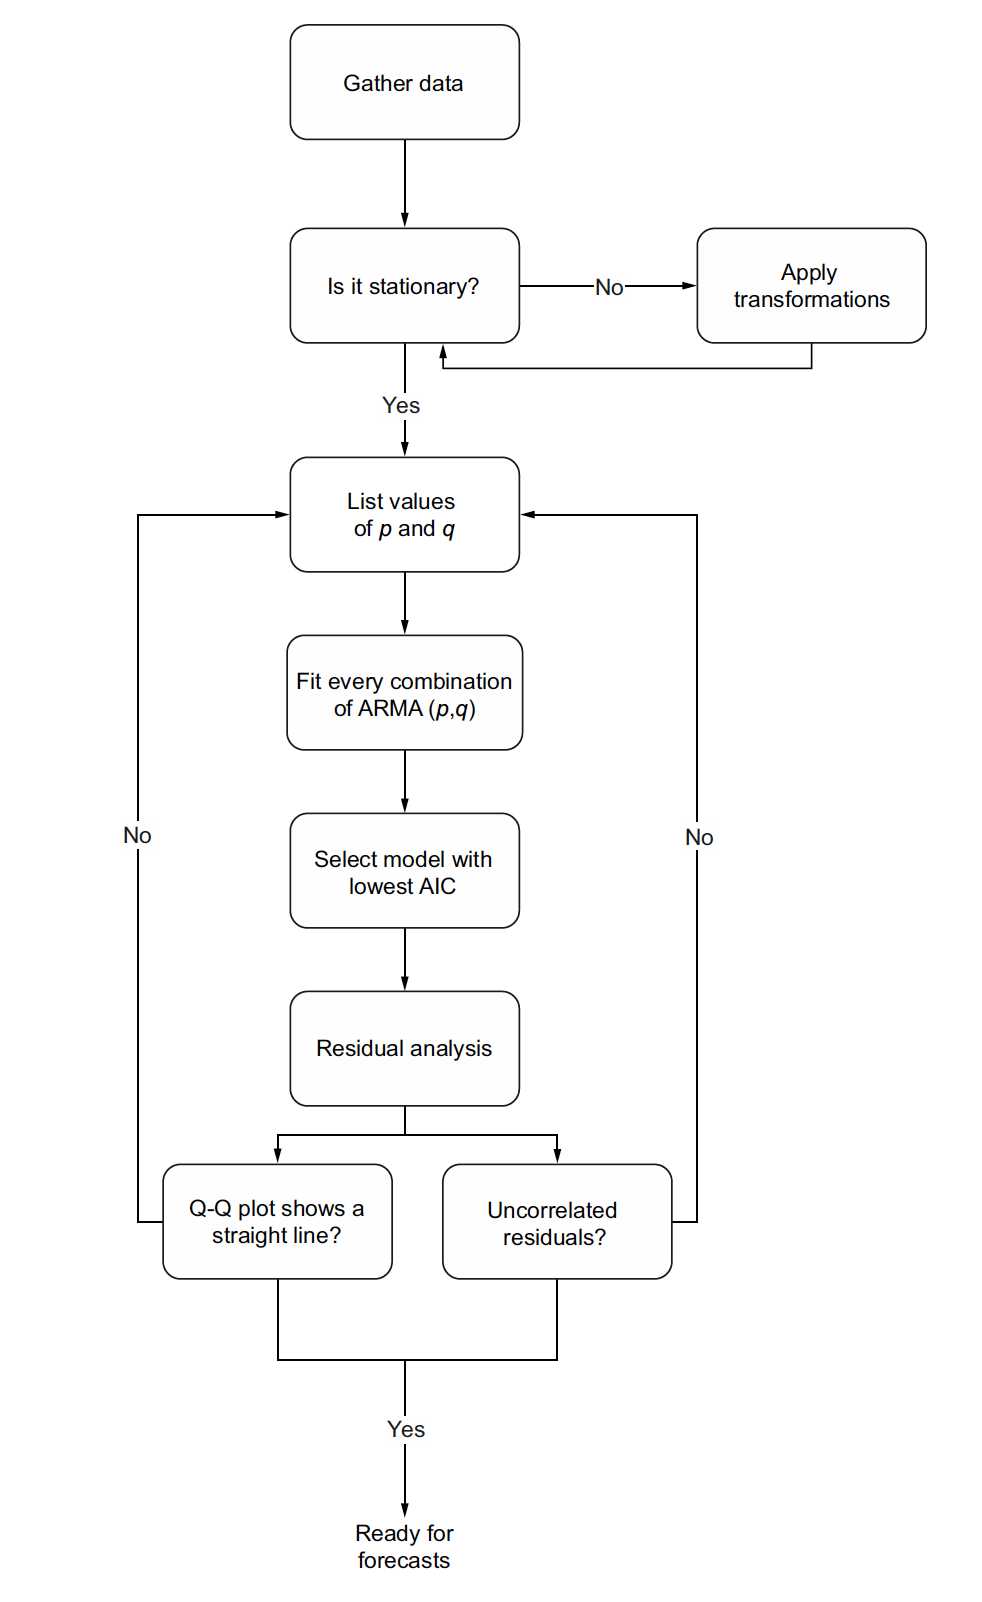

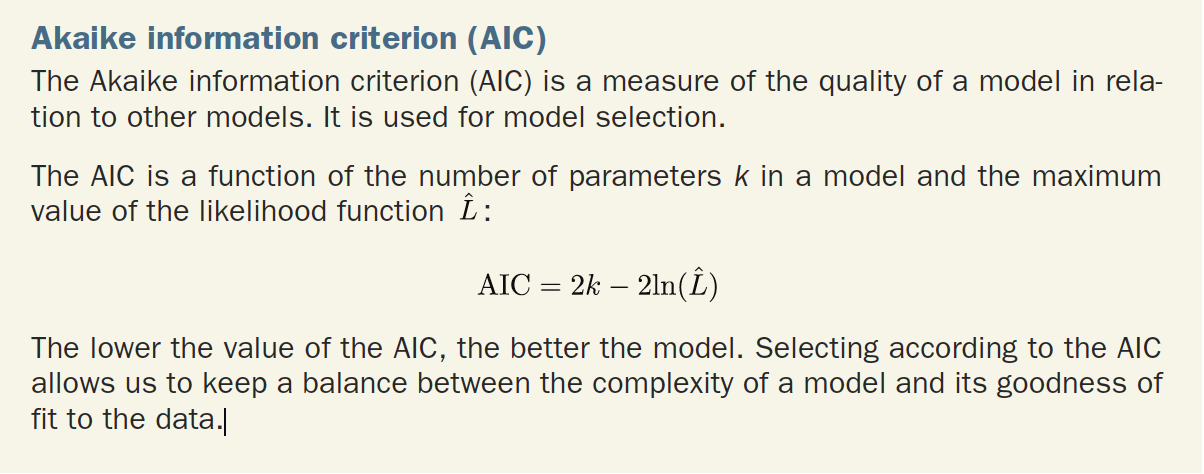

The likelihood function measures the goodness of fit of a model. It can be viewed
as the opposite of the distribution function. Given a model with fixed parameters, the
distribution function will measure the probability of observing a data point. The likelihood
function flips the logic. Given a set of observed data, it will estimate how likely it
is that different model parameters will generate the observed data.

For example, consider the situation where we roll a six-sided die. The distribution
function tells us that there is a $1/6$ probability that we’ll observe one of these values:
$[1,2,3,4,5,6]$. Now let’s flip this logic to explain the likelihood function. Suppose that
you roll a die 10 times and you obtain the following values: $[1,5,3,4,6,2,4,3,2,1]$. The likelihood function will determine how likely it is that the die has six sides. Applying
this logic to the context of $AIC$, we can think of the likelihood function as an answer
to the question “How likely is it that my observed data is coming from an $ARMA(1,1)$
model?” If it is very likely, meaning that $\hat{L}$ is large, then the $ARMA(1,1)$ model fits the
data well.

### Selecting the best model using $AIC$


In [6]:
ps = range(0, 4, 1)
qs = range(0, 4, 1)

order_list = list(product(ps, qs))
print(order_list)

[(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]


In [7]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tqdm.auto import tqdm

def optimize_ARMA(ts, order_list) -> pd.DataFrame:
    results = []

    for order in tqdm(order_list):
        try:
            model = SARIMAX(ts, order=(order[0], 0, order[1]), simple_differencing=False).fit(disp=False)
            aic = model.aic
            results.append((order, aic))
        except:
            continue

    result_df = pd.DataFrame(results, columns=['(p,q)', 'AIC']).sort_values(by='AIC').reset_index(drop=True)
    return result_df

In [8]:
result_df = optimize_ARMA(ARMA_1_1, order_list)
result_df

  0%|          | 0/16 [00:00<?, ?it/s]

,"(p,q)",AIC
0,"(1, 1)",2801.407785
1,"(2, 1)",2802.906070
2,"(1, 2)",2802.967762
3,"(0, 3)",2803.666793
4,"(1, 3)",2804.524027
5,"(3, 1)",2804.588567
6,"(2, 2)",2804.822282
7,"(3, 3)",2806.163016
8,"(2, 3)",2806.175380
9,"(3, 2)",2806.894930


As mentioned in the previous section, the AIC is a measure of relative quality. Here we
can say that an ARMA(1,1) model is the best model relative to all other models that
we fit to our data. Now we need an absolute measure of the model’s quality. This
brings us to the next step of our modeling procedure, which is residual analysis.

### Performing residuals analysis 

#### Qualitative analysis: studying the Q-Q plot

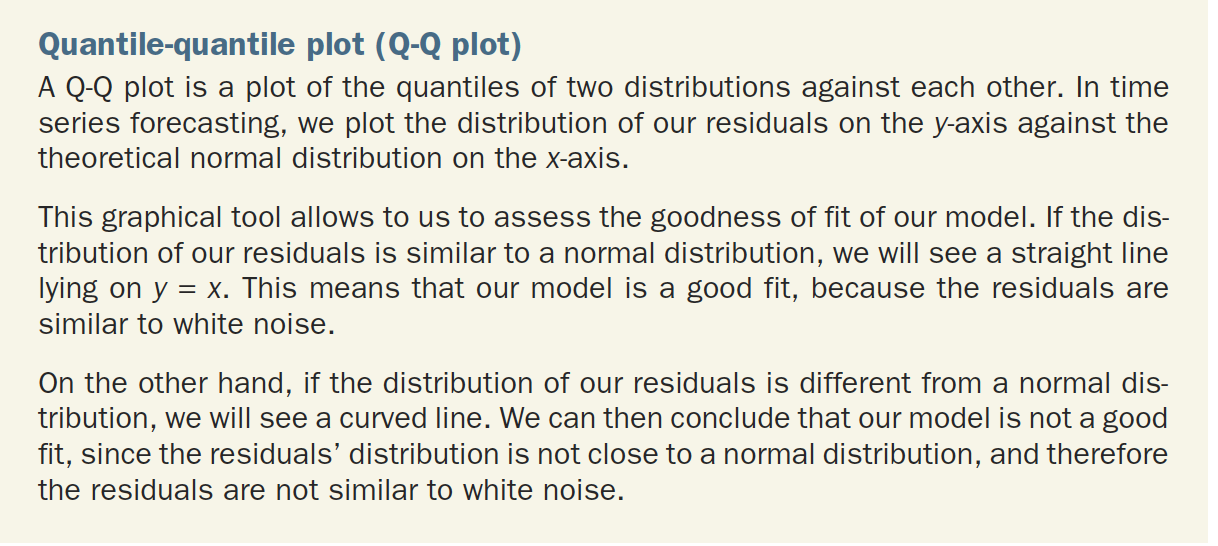

## Quantitative analysis: Ljung-Box test


> **The Ljung-Box** test is a statistical test that determines whether the autocorrelation of
a group of data is significantly different from $0$.
In time series forecasting, we apply the Ljung-Box test on the model’s residuals to
test whether they are similar to white noise. The null hypothesis states that the data
is independently distributed, meaning that there is no autocorrelation. 

* If the $p-value$ is larger than $0.05$, we cannot reject the **null hypothesis**, meaning that the residuals
are independently distributed. Therefore, there is no autocorrelation, the residuals
are similar to white noise, and the model can be used for forecasting.

* If the $p-value$ is less than $0.05$, we reject the **null hypothesis**, meaning that our residuals
are not independently distributed and are correlated. The model cannot be used
for forecasting.

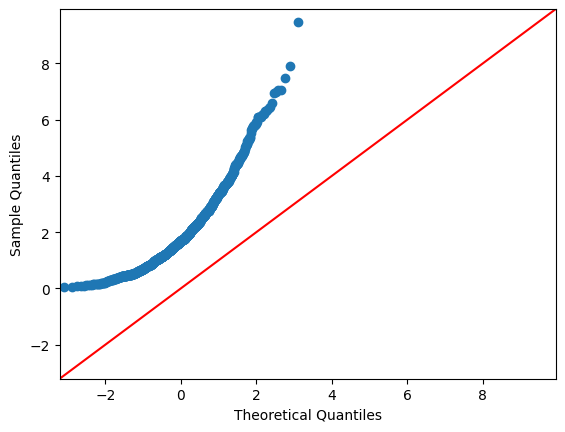

In [9]:
from statsmodels.graphics.gofplots import qqplot
# Data from gamma distribution
gamma = np.random.default_rng().standard_gamma(shape=2, size=1000)

qqplot(gamma, line='45');

plt.savefig('figures/CH06_F11_peixeiro.png', dpi=300)

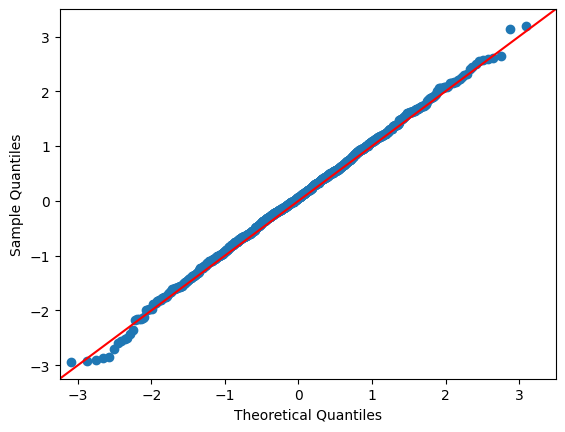

In [10]:
# Data from normal distribution
normal = np.random.normal(size=1000)

qqplot(normal, line='45');

plt.savefig('figures/CH06_F10_peixeiro.png', dpi=300)

### Performing residuals analysis 

In [11]:
model = SARIMAX(ARMA_1_1, order=(1,0,1), simple_differencing=False)
model_fit = model.fit(disp=False)
residuals = model_fit.resid

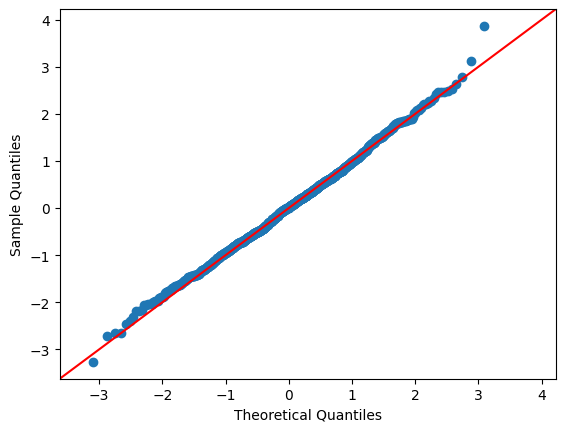

In [12]:
from statsmodels.graphics.gofplots import qqplot

qqplot(residuals, line='45');

plt.savefig('figures/CH06_F13_peixeiro.png', dpi=300)

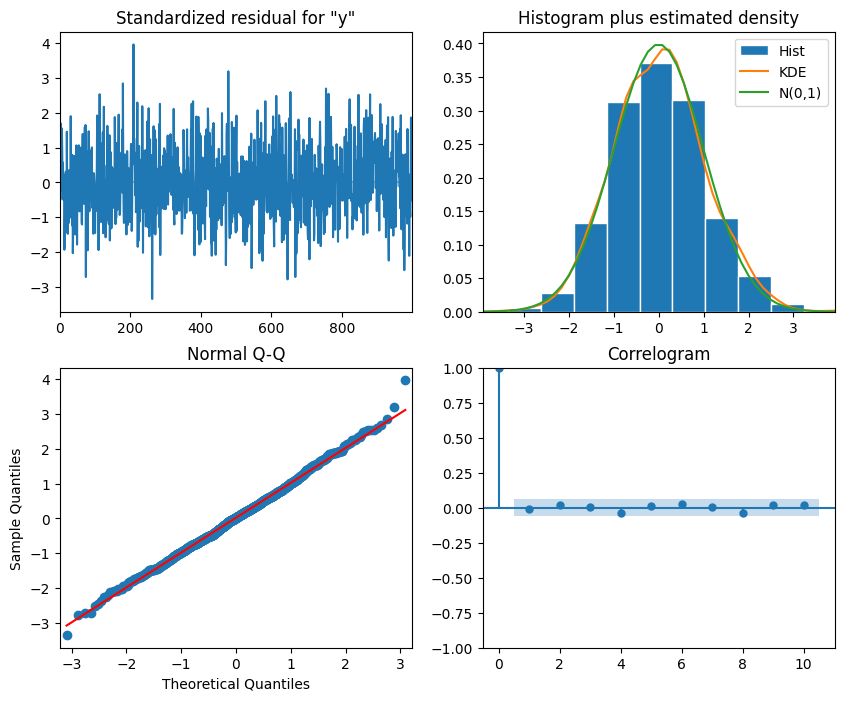

In [13]:
model_fit.plot_diagnostics(figsize=(10, 8));

plt.savefig('figures/CH06_F14_peixeiro.png', dpi=300)

In [14]:
from statsmodels.stats.diagnostic import acorr_ljungbox

acorr_ljungbox(residuals, np.arange(1, 11, 1))



,lb_stat,lb_pvalue
1,0.030706,0.860897
2,0.528021,0.767966
3,0.540904,0.909817
4,2.079774,0.721089
5,2.271897,0.810385
6,2.896262,0.821750
7,2.900378,0.894063
8,4.418799,0.817501
9,4.787567,0.852419
10,5.246805,0.874093


## 6.5 Applying the general modeling procedure 

## Forecasting bandwidth usage for data centers

>Suppose that you are tasked with predicting bandwidth usage for a large data center.
Bandwidth is defined as the maximum rate of data that can be transferred. Its base
unit is bits per second (bps).

> Forecasting bandwidth usage allows data centers to better manage their computing
resources. In the case where less bandwidth usage is expected, they can shut down
some of their computing resources. This in turns reduces expenses and allows for
maintenance. On the other hand, if bandwidth usage is expected to increase, they can
dedicate the required resources to sustain the demand and ensure low latency, thus
keeping their customers satisfied.

> For this situation, there are 10,000 data points representing the hourly bandwidth
usage starting in January 1, 2019. Here the bandwidth is measured in megabits per second
(Mbps), which is equivalent to 106 bps.

In [15]:
import pandas as pd



data_url='https://raw.githubusercontent.com/waelrash1/timeSeriesPy/master/data/bandwidth.csv'

df = pd.read_csv(data_url)

df.head()


,hourly_bandwidth
0,1000.496714
1,1000.969408
2,1002.046019
3,1004.702118
4,1007.447816


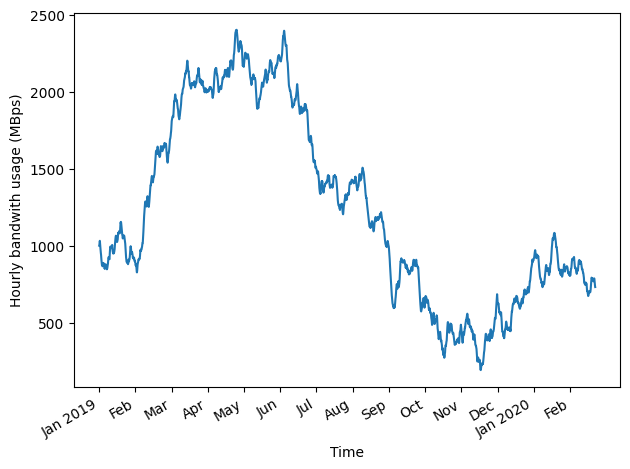

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(df['hourly_bandwidth'])
ax.set_xlabel('Time')
ax.set_ylabel('Hourly bandwith usage (MBps)')

plt.xticks(
    np.arange(0, 10000, 730), 
    ['Jan 2019', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan 2020', 'Feb'])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH06_F02_peixeiro.png', dpi=300)

In [17]:
ADF_result = adfuller(df['hourly_bandwidth'])

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -0.8714653199452729
p-value: 0.7972240255014553


In [18]:
bandwidth_diff = np.diff(df.hourly_bandwidth, n=1)

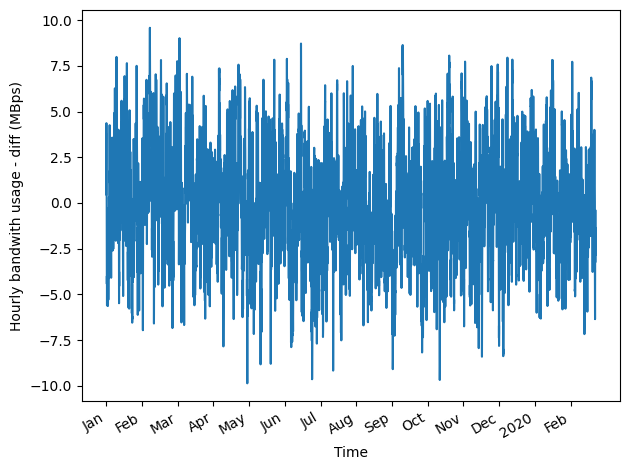

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(bandwidth_diff)
ax.set_xlabel('Time')
ax.set_ylabel('Hourly bandwith usage - diff (MBps)')

plt.xticks(
    np.arange(0, 10000, 730), 
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '2020', 'Feb'])

fig.autofmt_xdate()
plt.tight_layout()

# plt.savefig('figures/CH06_F_peixeiro.png', dpi=300)

In [20]:
ADF_result = adfuller(bandwidth_diff)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -20.694853863789017
p-value: 0.0


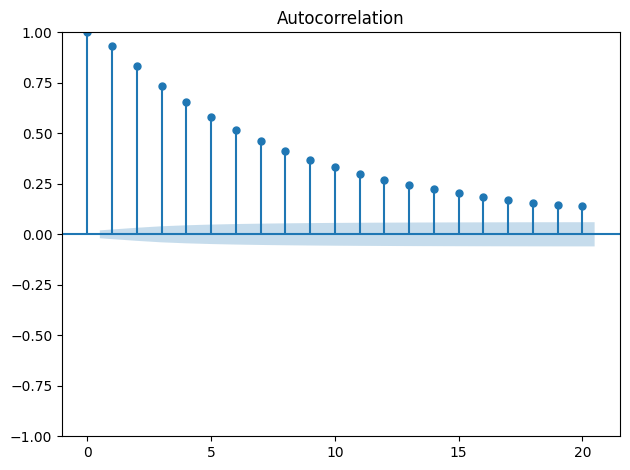

In [21]:
plot_acf(bandwidth_diff, lags=20);

plt.tight_layout()

# plt.savefig('figures/CH06_F_peixeiro.png', dpi=300)

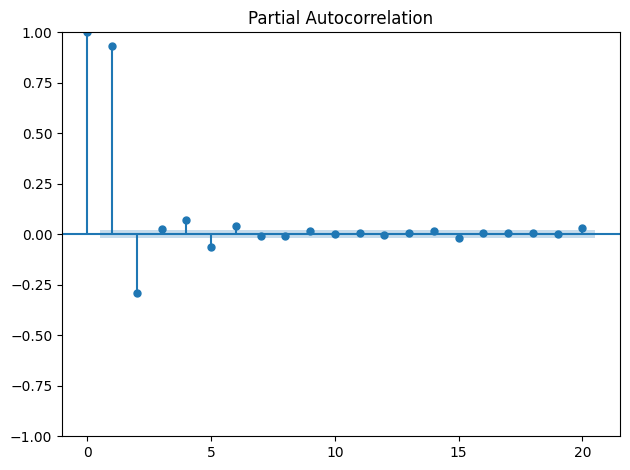

In [22]:
plot_pacf(bandwidth_diff, lags=20);

plt.tight_layout()

# plt.savefig('figures/CH06_F_peixeiro.png', dpi=300)

In [23]:
df_diff = pd.DataFrame({'bandwidth_diff': bandwidth_diff})

train = df_diff[:-168]
test = df_diff[-168:]

print(len(train))
print(len(test))

9831
168


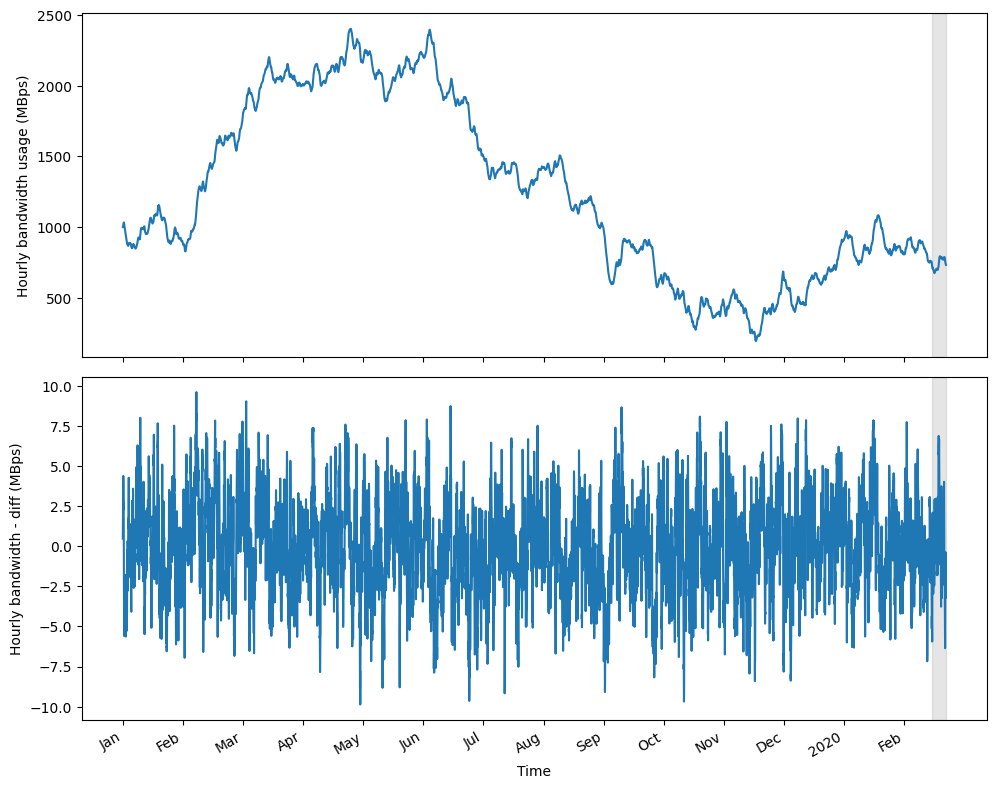

In [24]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 8))

ax1.plot(df['hourly_bandwidth'])
ax1.set_xlabel('Time')
ax1.set_ylabel('Hourly bandwidth usage (MBps)')
ax1.axvspan(9831, 10000, color='#808080', alpha=0.2)

ax2.plot(df_diff['bandwidth_diff'])
ax2.set_xlabel('Time')
ax2.set_ylabel('Hourly bandwidth - diff (MBps)')
ax2.axvspan(9830, 9999, color='#808080', alpha=0.2)

plt.xticks(
    np.arange(0, 10000, 730), 
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '2020', 'Feb'])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH06_F17_peixeiro.png', dpi=300)

In [25]:
from typing import Union

def optimize_ARMA(endog: Union[pd.Series, list], order_list: list) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(endog, order=(order[0], 0, order[1]), simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [26]:
ps = range(0, 4, 1)
qs = range(0, 4, 1)

order_list = list(product(ps, qs))

In [27]:
result_df = optimize_ARMA(train['bandwidth_diff'], order_list)
result_df

  0%|          | 0/16 [00:00<?, ?it/s]

,"(p,q)",AIC
0,"(3, 2)",27991.063879
1,"(2, 3)",27991.287509
2,"(2, 2)",27991.603598
3,"(3, 3)",27993.416924
4,"(1, 3)",28003.349550
5,"(1, 2)",28051.351401
6,"(3, 1)",28071.155496
7,"(3, 0)",28095.618186
8,"(2, 1)",28097.250766
9,"(2, 0)",28098.407664


In [28]:
model = SARIMAX(train['bandwidth_diff'], order=(2,0,2), simple_differencing=False)
model_fit = model.fit(disp=False)
print(model_fit.summary())

# StackOverflow to save output as png

                               SARIMAX Results                                
Dep. Variable:         bandwidth_diff   No. Observations:                 9831
Model:               SARIMAX(2, 0, 2)   Log Likelihood              -13990.802
Date:                Mon, 06 Mar 2023   AIC                          27991.604
Time:                        13:32:52   BIC                          28027.570
Sample:                             0   HQIC                         28003.788
                               - 9831                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3486      0.052      6.765      0.000       0.248       0.450
ar.L2          0.4743      0.047     10.000      0.000       0.381       0.567
ma.L1          0.8667      0.050     17.249      0.0

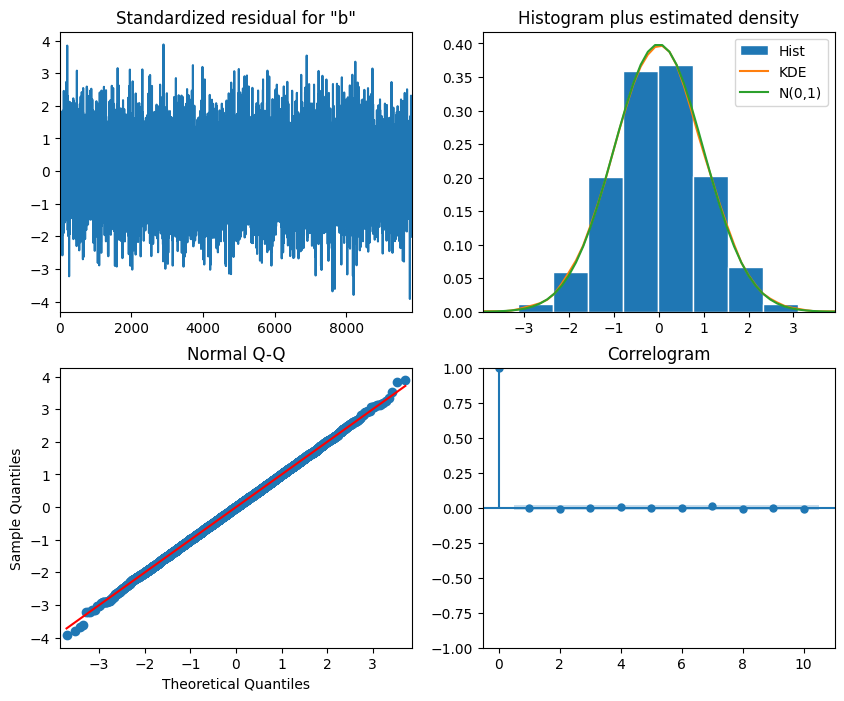

In [29]:
model_fit.plot_diagnostics(figsize=(10, 8));

plt.savefig('figures/CH06_F19_peixeiro.png', dpi=300)

In [30]:
residuals = model_fit.resid

lbvalue, pvalue = acorr_ljungbox(residuals, np.arange(1, 11, 1))

print(pvalue)

lb_pvalue


## 6.6 Forecasting bandwidth usage

In [31]:
def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:
    
    total_len = train_len + horizon
    end_idx = train_len
    
    if method == 'mean':
        pred_mean = []
        
        for i in range(train_len, total_len, window):
            mean = np.mean(df[:i].values)
            pred_mean.extend(mean for _ in range(window))
            
        return pred_mean

    elif method == 'last':
        pred_last_value = []
        
        for i in range(train_len, total_len, window):
            last_value = df[:i].iloc[-1].values[0]
            pred_last_value.extend(last_value for _ in range(window))
            
        return pred_last_value
    
    elif method == 'ARMA':
        pred_ARMA = []
        
        for i in range(train_len, total_len, window):
            model = SARIMAX(df[:i], order=(2,0,2))
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_ARMA.extend(oos_pred)
            
        return pred_ARMA

In [32]:
TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 2

pred_mean = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'mean')
pred_last_value = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'last')
pred_ARMA = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'ARMA')

test.loc[:, 'pred_mean'] = pred_mean
test.loc[:, 'pred_last_value'] = pred_last_value
test.loc[:, 'pred_ARMA'] = pred_ARMA

test.head()

,bandwidth_diff,pred_mean,pred_last_value,pred_ARMA
9831,-5.943995,-0.028214,-5.791207,-5.460661
9832,-5.865194,-0.028214,-5.791207,-4.890626
9833,-3.197066,-0.029410,-5.865194,-5.335905
9834,-1.090197,-0.029410,-5.865194,-4.751731
9835,0.665291,-0.029840,-1.090197,-0.375596


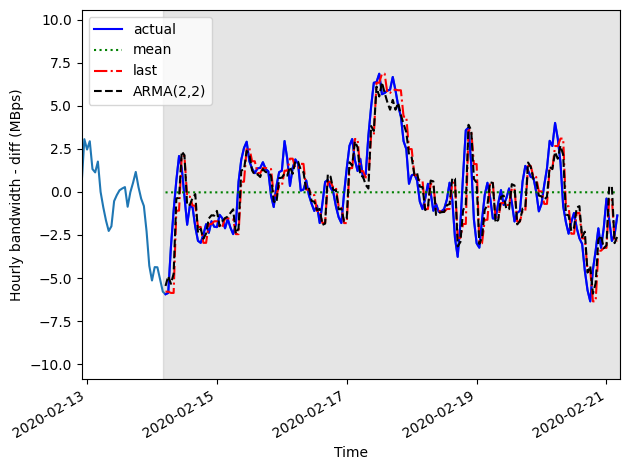

In [33]:
fig, ax = plt.subplots()

ax.plot(df_diff['bandwidth_diff'])
ax.plot(test['bandwidth_diff'], 'b-', label='actual')
ax.plot(test['pred_mean'], 'g:', label='mean')
ax.plot(test['pred_last_value'], 'r-.', label='last')
ax.plot(test['pred_ARMA'], 'k--', label='ARMA(2,2)')

ax.legend(loc=2)

ax.set_xlabel('Time')
ax.set_ylabel('Hourly bandwidth - diff (MBps)')

ax.axvspan(9830, 9999, color='#808080', alpha=0.2)

ax.set_xlim(9800, 9999)

plt.xticks(
    [9802, 9850, 9898, 9946, 9994],
    ['2020-02-13', '2020-02-15', '2020-02-17', '2020-02-19', '2020-02-21'])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH06_F20_peixeiro.png', dpi=300)

In [34]:
mse_mean = mean_squared_error(test['bandwidth_diff'], test['pred_mean'])
mse_last = mean_squared_error(test['bandwidth_diff'], test['pred_last_value'])
mse_ARMA = mean_squared_error(test['bandwidth_diff'], test['pred_ARMA'])

print(mse_mean, mse_last, mse_ARMA)

6.306526957989325 2.2297582947733656 1.7690462114420604


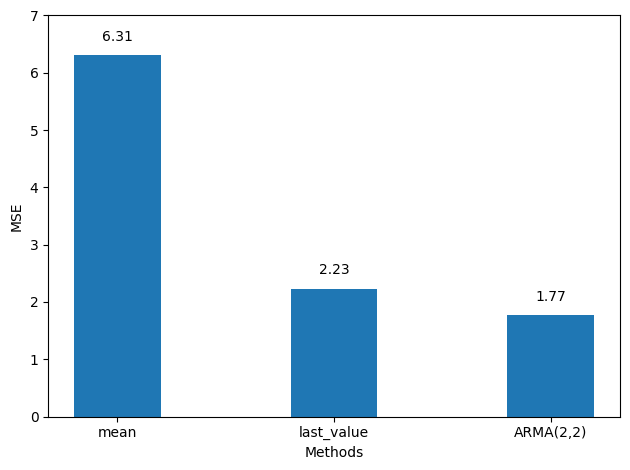

In [35]:
fig, ax = plt.subplots()

x = ['mean', 'last_value', 'ARMA(2,2)']
y = [mse_mean, mse_last, mse_ARMA] 

ax.bar(x, y, width=0.4)
ax.set_xlabel('Methods')
ax.set_ylabel('MSE')
ax.set_ylim(0, 7)

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.25, s=str(round(value, 2)), ha='center')

plt.tight_layout()

# plt.savefig('figures/CH06_F_peixeiro.png', dpi=300)

In [36]:
df['pred_bandwidth'] = pd.Series()
df['pred_bandwidth'][9832:] = df['hourly_bandwidth'].iloc[9832] + test['pred_ARMA'].cumsum()

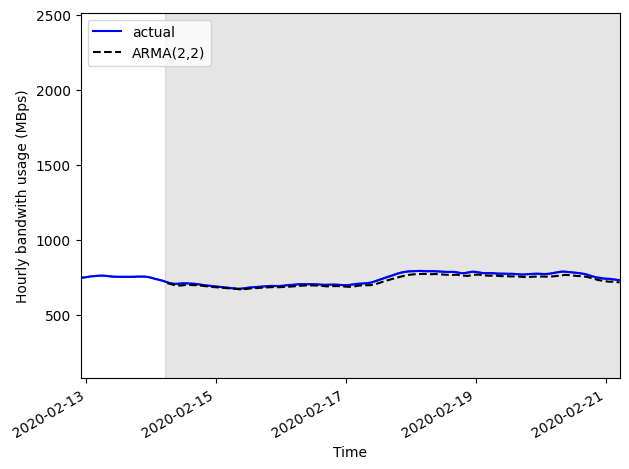

In [37]:
fig, ax = plt.subplots()

ax.plot(df['hourly_bandwidth'])
ax.plot(df['hourly_bandwidth'], 'b-', label='actual')
ax.plot(df['pred_bandwidth'], 'k--', label='ARMA(2,2)')

ax.legend(loc=2)

ax.set_xlabel('Time')
ax.set_ylabel('Hourly bandwith usage (MBps)')

ax.axvspan(9831, 10000, color='#808080', alpha=0.2)

ax.set_xlim(9800, 9999)

plt.xticks(
    [9802, 9850, 9898, 9946, 9994],
    ['2020-02-13', '2020-02-15', '2020-02-17', '2020-02-19', '2020-02-21'])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH06_F21_peixeiro.png', dpi=300)

In [38]:
mae_ARMA_undiff = mean_absolute_error(df['hourly_bandwidth'][9832:], df['pred_bandwidth'][9832:])

print(mae_ARMA_undiff)

14.000362773294084
